In [1]:
import pandas
import numpy
from numpy import array, zeros,deg2rad, cos, sin, arange, pi
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 16})

In [37]:
station_ids = ['nist', 'yell', 'cedu', 'chan', 'kokv']

In [45]:
station_id = station_ids[2]
filepath = "/Users/liuzijun 1/Desktop/COEN1550/Material7/Table_{station_id}_2017_all.csv".format(station_id=station_id)

In [46]:
data = pandas.read_csv(filepath)

In [47]:
data.head()

,Date_str,Station_id,Satellite_id,Azimuth,Elevation,TEC_diff
0,20170101,cedu,G01,-125.741699,4.069435,0.401204
1,20170101,cedu,G01,-130.612976,11.322237,18.134665
2,20170101,cedu,G01,-96.085373,70.567271,14.073657
3,20170101,cedu,G01,-86.838081,71.102563,2.700751
4,20170101,cedu,G01,-67.939331,70.450069,0.702881


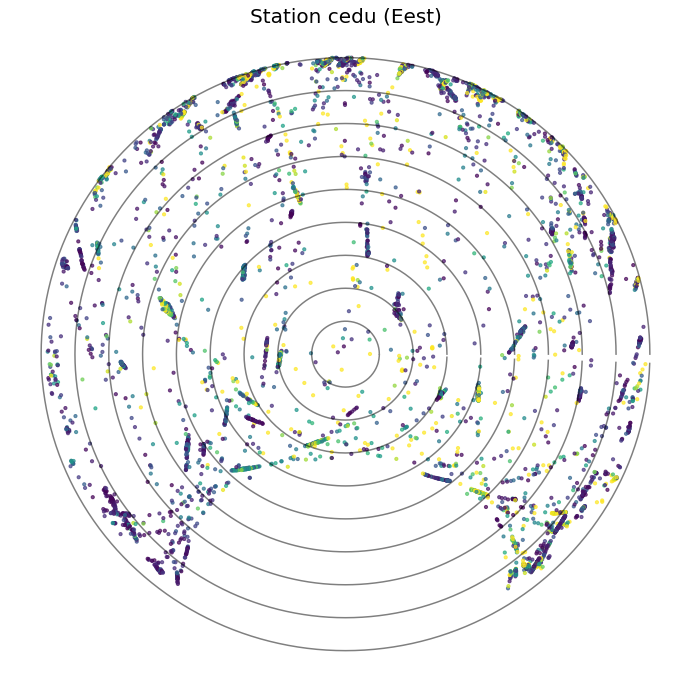

In [49]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
tec_diff = data['TEC_diff']
ind = tec_diff > 10
r = 90 - data['Elevation'][ind]
theta = deg2rad(90 - data['Azimuth'][ind])
x, y = r * cos(theta), r * sin(theta)
ax.scatter(x, y, s=10, alpha=.7, c=data["TEC_diff"][ind], vmax=100)
for el in arange(80, -1, -10):
    theta = arange(0, 2 * pi, pi / 100)
    r = 90 - el
    x, y = r * cos(theta), r * sin(theta)
    ax.plot(x, y, color='k', alpha=.5)
for sp in ax.spines.values():
    sp.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
plt.title("Station {} (Eest)".format(station_id), fontsize=20)
plt.show()

1. make a histogram with azimuth and jump occurence
2. do a regression with azimuth and jump occurence
3. 

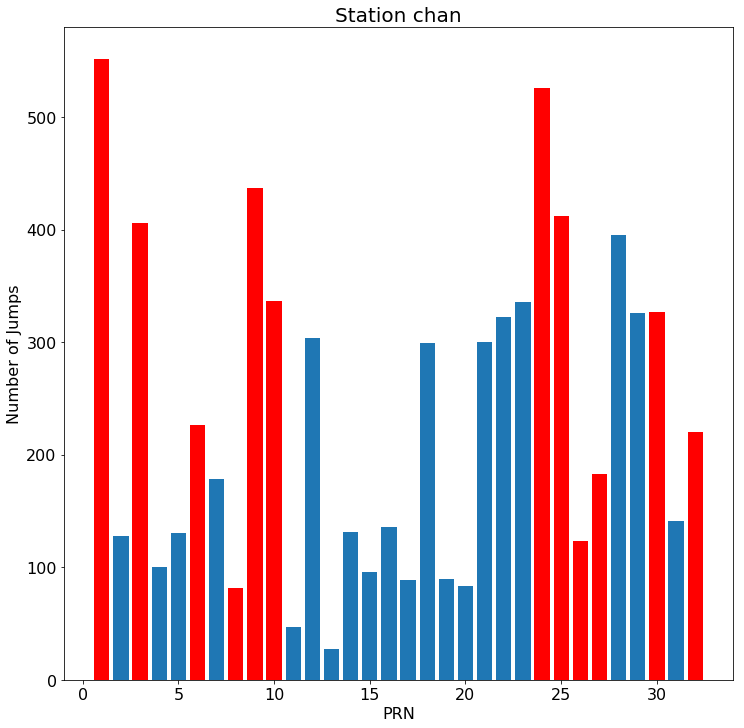

In [44]:
sat_ids = ['G{0:02}'.format(prn) for prn in range(1, 33)]
total_jumps = zeros(32)
for i, sat_id in enumerate(sat_ids):
    ind = (data['Satellite_id'] == sat_id) & (data['TEC_diff'] > 50)
    total_jumps[i] = numpy.sum(ind)

iif_prns = [1, 3, 6, 8, 9, 10, 24, 25, 26, 27, 30, 32]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.bar(range(1, 33), total_jumps)
for prn in iif_prns:
    ax.bar(prn, total_jumps[prn - 1], color='r')
ax.set_xlabel('PRN')
ax.set_ylabel('Number of Jumps')
plt.title("Station {}".format(station_id), fontsize=20)
plt.show()

Analysis of Phase Jump Occurrence in IGS Station Data

TEC plot

Sky Plot for eachh station

Bar plot of total number of jumps for each SatelliteID

Citations:
----

- IGS stations (check website for citation information)
- GPS book (use Google)

support vector machine

azimuth plays a role on jump occurence